# Spectrogram setup in Python

### Import key libraries and setup

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import NMF

### Import all ERP Trials for P35 - Category Faces, Session 1, Channel 1

In [2]:
inp_trials = "/Users/shamindras/PERSONAL/LEARNING/REPOS/neuroada_analysis/data/localizer_erp/P35_specgram/P35-channel-01-faces-trials.csv"

In [3]:
faces_trials = np.loadtxt(fname = inp_trials, skiprows = 1, delimiter = ",")
faces_trials.shape

(83, 1500)

**Check:** *As expected we have 83 trials for the faces category and 1500 individual millisecond timepoints*

### Extract a Single trial to plot the relevant spectrogram

In [4]:
one_trial = faces_trials[1]
one_trial.shape

(1500,)

**Check:** *As expected we have 1 trial for the faces category and 1500 individual millisecond timepoints*

### Produce the Spectrogram for a Single Trial

We will use the same construction frequencies as the `R` code:

* Single Trial
* Sampling frequency of `1000ms`
* Window Type `hanning`
* Sampling frequency of `1000ms`


In [5]:
fs = 1e3
f, t, Sxx = signal.spectrogram(x = one_trial, fs = fs, window = 'hann', nperseg = 128, noverlap = 96)
f.shape
Sxx.shape

(65, 43)

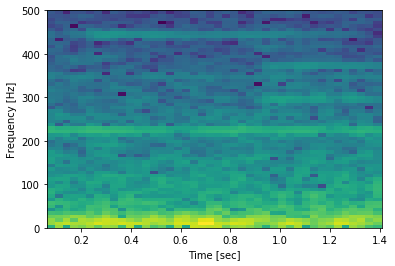

In [6]:
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [7]:
print("spectrogram", Sxx.shape, sep = ": ")
print("t", t.shape, sep = ": ")
print("f", f.shape, sep = ": ")

spectrogram: (65, 43)
t: (43,)
f: (65,)


## Perform NMF to decompose the spectrogram V as W times H

**Note:** Here we use the *Itakura-Saito* Divergence as our metric when performing NMF.

More details on this can be found [here](http://service.tsi.telecom-paristech.fr/cgi-bin/valipub_download.cgi?dId=61)

In [8]:
np.count_nonzero(Sxx == 0)

0

We use the same specifications as when we run this in **`R`**

In [9]:
model = NMF(n_components=5, init='random', random_state=0, beta_loss='itakura-saito', solver = 'mu')

In [10]:
W = model.fit_transform(X=Sxx)
H = model.components_

In [11]:
print("S", Sxx.shape, sep = ": ")
print("W", W.shape, sep = ": ")
print("H", H.shape, sep = ": ")

S: (65, 43)
W: (65, 5)
H: (5, 43)


In [12]:
diff = Sxx - np.matmul(W, H)

In [13]:
np.ptp(diff)

583.5002429283946

**Note:** There do appear to be differences in the factorization
The following plots are taken from this [useful post](http://nbviewer.jupyter.org/gist/ingle/93de575aac6a4c7fe9ee5f3d5adab98f)

### Plot the "basis" vectors i.e. columns of W

/Users/shamindras/anaconda/envs/sklearnprod1/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


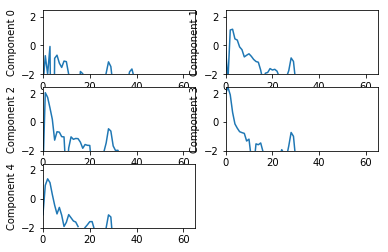

In [14]:
plt.figure()
logW = np.log10(W)
n_components = 5
for n in range(n_components):
    plt.subplot(np.ceil(n_components/2.0), 2, n+1)
    plt.plot(logW[:,n])
    plt.ylim(-2, logW.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Component %d' % n)

### Plot the rows of H i.e. the temporal activations

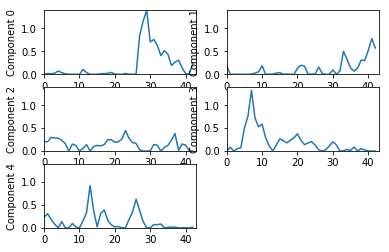

In [15]:
plt.figure()
for n in range(n_components):
    plt.subplot(np.ceil(n_components/2.0), 2, n+1)
    plt.plot(H[n])
    plt.ylim(0, H.max())
    plt.xlim(0, H.shape[1])
    plt.ylabel('Component %d' % n)

### Next Steps:

* How to interpret these results clearly for a single trial?
* How to determine the number of components in the NMF?
* How to combine results across trials?
* How to capture the uncertainty in this measure? 